In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Na podstawie danych wejściowych można przewidzieć produkcję energii elektrycznej przez elektrownię z cyklem łączonym na podstawie temperatury, ciśnienia atmosferycznego, wilgotności względnej oraz podciśnienia spalin.

In [2]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))
ann.compile(optimizer = 'adam', loss = 'mse')
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 208884.7812 - val_loss: 118821.1016
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 57096.6133 - val_loss: 306.7819
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 267.7208 - val_loss: 203.3884
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 176.8777 - val_loss: 136.7868
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 126.7215 - val_loss: 101.2367
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 94.3112 - val_loss: 76.9713
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 74.3856 - val_loss: 66.9926
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 67.2077 - val_loss: 66.8481
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 62.2228 - val_loss: 59.8377
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 59.0892 - val_loss: 58.7477
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 57.0515 - val_loss: 57.4951
E

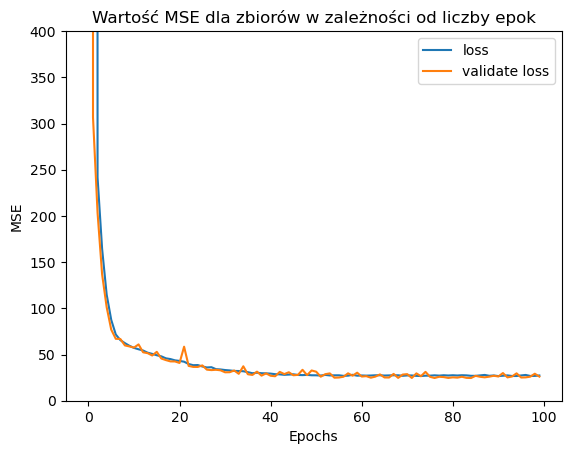

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validate loss')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Wartość MSE dla zbiorów w zależności od liczby epok")
plt.ylim([0,400])
plt.legend()
plt.show()

Można zauważyć, że dla tych danych osiągamy MSE o wartości zbliżonej do 25 i poniżej tej wartości sieć nie może zejść od około 40 epoki. Możemy również dostrzec, że MSE dla zbioru treningowego oraz testowego są zbliżone do siebie. Widać lekkie zaburzenia wartości MSE dla zbioru testowego.

In [7]:
y_pred = ann.predict(X_test)
y_pred

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[432.4198 ],
       [463.64706],
       [467.20984],
       ...,
       [474.38675],
       [441.16498],
       [460.40274]], dtype=float32)

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9107235923189416

R^2 wynosi około 90%.

# Dodanie nowych warstw

Dodajemy 2 nowe warstwy ukryte.

In [9]:
ann2 = tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann2.add(tf.keras.layers.Dense(units = 1))
ann2.compile(optimizer = 'adam', loss = 'mse')
history2 = ann2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 290606.3438 - val_loss: 115754.4766
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 52215.1602 - val_loss: 270.1498
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 263.2499 - val_loss: 264.3619
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 255.1768 - val_loss: 258.3887
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 256.2445 - val_loss: 251.3379
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 248.0548 - val_loss: 241.8986
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 233.1400 - val_loss: 231.5656
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 225.2147 - val_loss: 222.6045
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 213.8685 - val_loss: 209.4618
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 203.3355 - val_loss: 196.3490
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 190.1141 - val_loss

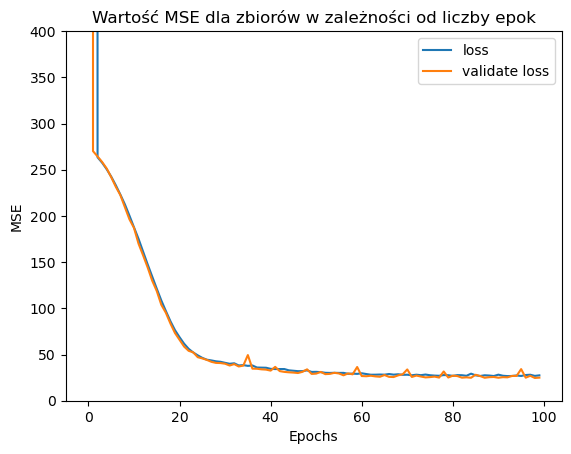

In [19]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='validate loss')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Wartość MSE dla zbiorów w zależności od liczby epok")
plt.ylim([0,400])
plt.legend()
plt.show()

In [11]:
y_pred2 = ann2.predict(X_test)
y_pred2

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[431.63553],
       [463.0407 ],
       [466.69626],
       ...,
       [473.65604],
       [440.91946],
       [459.9487 ]], dtype=float32)

In [12]:
r2_score(y_test, y_pred2)

0.9145823206678083

# Zwiększenie liczby neuronów

In [13]:
ann3 = tf.keras.models.Sequential()
ann3.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
ann3.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
ann3.add(tf.keras.layers.Dense(units = 1))
ann3.compile(optimizer = 'adam', loss = 'mse')
history3 = ann3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 98592.1172 - val_loss: 179.3064
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 173.3828 - val_loss: 157.8365
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 151.5087 - val_loss: 134.3471
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 128.4162 - val_loss: 109.2331
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 98.2485 - val_loss: 83.8852
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 79.4102 - val_loss: 62.2703
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 58.6793 - val_loss: 48.4212
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 47.5901 - val_loss: 39.7129
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39.2361 - val_loss: 35.0396
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.4453 - val_loss: 31.7733
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31.6089 - val_loss: 30.2456
Epoch 12/

MSE spada szybciej niż dla pierwszych dwóch sieci.

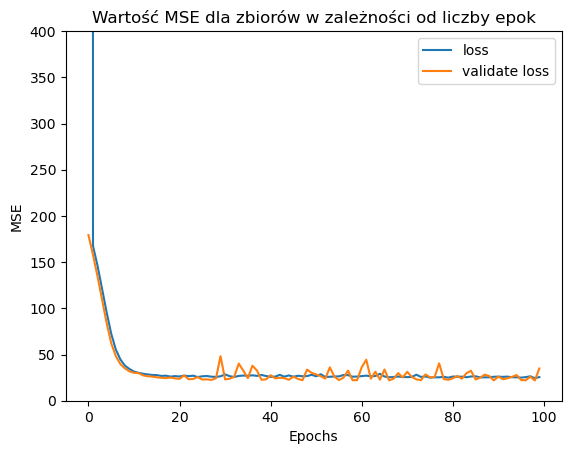

In [20]:
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='validate loss')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Wartość MSE dla zbiorów w zależności od liczby epok")
plt.ylim([0,400])
plt.legend()
plt.show()

Widać duże zmiany wartości MSE dla zbioru walidacyjnego.

In [15]:
y_pred3 = ann3.predict(X_test)
y_pred3

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[430.1207 ],
       [458.02054],
       [463.15356],
       ...,
       [469.94534],
       [435.33072],
       [454.8569 ]], dtype=float32)

In [16]:
r2_score(y_test, y_pred3)

0.8807452154514451

W każdym z 3 przypadków model zszedł do wartości MSE około 25 i na niej pozostał. Może to oznaczać, że dane są proste i nawet mała sieć o małej liczbie warstw i neuronów jest w stanie osiągnąć maksymalną możliwą dokładność. We wszystkich przypadkach MSE zbioru treningowego i walidacyjnego niemal się pokrywają. Dla większej liczby neuronów można zauważyć spore wahania wartości MSE dla zbioru testowego.

Podsumowując, dla naszych danych najlepszą siecią będzie ta z pierwszego przypadku, ponieważ mimo prostoty potrafi dobrze przewidzieć wyniki i nie grozi nam przeuczenie.